<a href="https://colab.research.google.com/github/MIARD/AI-CSE422/blob/main/SMC_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import python required library for a data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_excel('SMC_Data_Analysis.xlsx')

In [ ]:
print("Dataframe Shape: ", (df.count(), len(df.columns)))

Dataframe Shape:  (S/l                  205
Start Date           205
Start Time           205
Criteria             205
Candle/Days          202
Signal               205
Entry                205
Stop Loss            205
Profit Target        205
Result               205
Profit               205
Loss                 205
Remaining Balance    205
R                    203
Comment               77
Cum Loss             205
Exit Date            205
Exit Time            205
dtype: int64, 18)


In [ ]:
# prompt: Show column types

print(df.dtypes)

S/l                           int64
Start Date           datetime64[ns]
Start Time                   object
Criteria                     object
Candle/Days                 float64
Signal                       object
Entry                       float64
Stop Loss                   float64
Profit Target               float64
Result                       object
Profit                      float64
Loss                          int64
Remaining Balance           float64
R                           float64
Comment                      object
Cum Loss                      int64
Exit Date            datetime64[ns]
Exit Time                    object
dtype: object


#Making some important columns

In [ ]:
df['startDateTime']=pd.to_datetime(df['Start Date'].astype(str) + ' ' + df['Start Time'].astype(str))

# prompt: make Exit date and Exit time column as datetime. Time is on UTC.
df['exitDateTime'] = pd.to_datetime(df['Exit Date'].astype(str) + ' ' + df['Exit Time'].astype(str),)

In [ ]:
df['Trade Duration (hours)'] = (df['exitDateTime'] - df['startDateTime']).dt.total_seconds() / 3600
df['Start_Weekday'] = df['startDateTime'].dt.day_name()
df['Exit_Weekday'] = df['exitDateTime'].dt.day_name()
df['Profit/Loss']= df['Profit'] - df['Loss']
df['Hour'] = df['startDateTime'].dt.hour

#Creating Important Tables

###Overall Statistics

In [ ]:
# prompt: Create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss

#Overall Statistics
overall_stats = pd.DataFrame({
    'Total Trades': [len(df)],
    'Total Win Count': [len(df[df['Profit'] > 0])],
    'Total Loss Count': [len(df[df['Loss'] < 0])],
    'Total Profit': [df['Profit'].sum()],
    'Total Loss': [df['Loss'].sum()],
    'Win Rate': [len(df[df['Profit/Loss'] > 0]) / len(df) if len(df) > 0 else 0],
    'Max Profit': [df['Profit/Loss'].max()],
    'Max Loss': [df['Profit/Loss'].min()],
    'Average Profit': [df[df['Profit/Loss'] > 0]['Profit/Loss'].mean() if len(df[df['Profit/Loss'] > 0]) > 0 else 0],
    'Average Loss': [df[df['Profit/Loss'] < 0]['Profit/Loss'].mean() if len(df[df['Profit/Loss'] < 0]) > 0 else 0],
    'Total Time': [df['Trade Duration (hours)'].sum()],
    'Average Time': [df['Trade Duration (hours)'].mean()],
    'Realized Profit/Loss': [df['Profit/Loss'].sum()]
})

print(overall_stats)

   Total Trades  Total Win Count  Total Loss Count  Total Profit  Total Loss  \
0           205              103                 0       27485.5        5100   

   Win Rate  Max Profit  Max Loss  Average Profit  Average Loss  Total Time  \
0  0.502439      1410.0     -50.0      266.849515         -50.0  588.583333   

   Average Time  Realized Profit/Loss  
0      2.871138               22385.5  


In [ ]:
overall_stats.head()

,Total Trades,Total Win Count,Total Loss Count,Total Profit,Total Loss,Win Rate,Max Profit,Max Loss,Average Profit,Average Loss,Total Time,Average Time,Realized Profit/Loss
0,205,103,0,27485.5,5100,0.502439,1410.0,-50.0,266.849515,-50.0,588.583333,2.871138,22385.5


###Hourly Statistics

In [ ]:
# prompt: Create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss on 24 Hour Basis. there will be 24 column for example 0:00-0:59, 1:00-1:59

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


hourly_stats = pd.DataFrame()
for hour in range(24):
    hourly_df = df[df['Hour'] == hour]
    hourly_stats_row = pd.DataFrame({
        'Hour': [f"{hour:02d}:00-{hour+1:02d}:59"],
        'Total Trades': [len(hourly_df)],
        'Total Win Count': [len(hourly_df[hourly_df['Profit'] > 0])],
        'Total Loss Count': [len(hourly_df[hourly_df['Loss'] > 0])],
        'Total Profit': [hourly_df['Profit'].sum()],
        'Total Loss': [hourly_df['Loss'].sum()],
        'Win Rate': [len(hourly_df[hourly_df['Profit/Loss'] > 0]) / len(hourly_df) if len(hourly_df) > 0 else 0],
        'Max Profit': [hourly_df['Profit/Loss'].max() if len(hourly_df) > 0 else 0],
        'Max Loss': [hourly_df['Profit/Loss'].min() if len(hourly_df) > 0 else 0],
        'Average Profit': [hourly_df[hourly_df['Profit/Loss'] > 0]['Profit/Loss'].mean() if len(hourly_df[hourly_df['Profit/Loss'] > 0]) > 0 else 0],
        'Average Loss': [hourly_df[hourly_df['Profit/Loss'] < 0]['Profit/Loss'].mean() if len(hourly_df[hourly_df['Profit/Loss'] < 0]) > 0 else 0],
        'Total Time': [hourly_df['Trade Duration (hours)'].sum()],
        'Average Time': [hourly_df['Trade Duration (hours)'].mean() if len(hourly_df) > 0 else 0],
        'Realized Profit/Loss': [hourly_df['Profit/Loss'].sum()]
    })

    hourly_stats = pd.concat([hourly_stats, hourly_stats_row], ignore_index=True)
print(hourly_stats)


           Hour  Total Trades  Total Win Count  Total Loss Count  \
0   00:00-01:59             6                6                 0   
1   01:00-02:59             7                4                 3   
2   02:00-03:59            11                2                 9   
3   03:00-04:59            13                6                 7   
4   04:00-05:59             8                7                 1   
5   05:00-06:59             4                4                 0   
6   06:00-07:59             9                4                 5   
7   07:00-08:59            13                6                 7   
8   08:00-09:59             7                4                 3   
9   09:00-10:59             6                4                 2   
10  10:00-11:59             9                5                 4   
11  11:00-12:59             4                1                 3   
12  12:00-13:59             9                5                 4   
13  13:00-14:59             9                5  

In [ ]:
hourly_stats.head(24)

,Hour,Total Trades,Total Win Count,Total Loss Count,Total Profit,Total Loss,Win Rate,Max Profit,Max Loss,Average Profit,Average Loss,Total Time,Average Time,Realized Profit/Loss
0,00:00-01:59,6,6,0,1060.5,0,1.000000,312.0,104.5,176.750000,0.0,31.333333,5.222222,1060.5
1,01:00-02:59,7,4,3,1038.0,150,0.571429,425.0,-50.0,259.500000,-50.0,22.000000,3.142857,888.0
2,02:00-03:59,11,2,9,357.0,450,0.181818,250.0,-50.0,178.500000,-50.0,-10.750000,-0.977273,-93.0
3,03:00-04:59,13,6,7,2043.0,350,0.461538,839.5,-50.0,340.500000,-50.0,35.916667,2.762821,1693.0
4,04:00-05:59,8,7,1,2227.0,50,0.875000,670.0,-50.0,318.142857,-50.0,63.750000,7.968750,2177.0
5,05:00-06:59,4,4,0,1042.5,0,1.000000,383.5,102.0,260.625000,0.0,8.333333,2.083333,1042.5
6,06:00-07:59,9,4,5,1069.5,250,0.444444,507.0,-50.0,267.375000,-50.0,16.000000,1.777778,819.5
7,07:00-08:59,13,6,7,1639.0,350,0.461538,500.0,-50.0,273.166667,-50.0,39.833333,3.064103,1289.0
8,08:00-09:59,7,4,3,743.5,150,0.571429,368.5,-50.0,185.875000,-50.0,15.500000,2.214286,593.5
9,09:00-10:59,6,4,2,763.0,100,0.666667,272.0,-50.0,190.750000,-50.0,15.083333,2.513889,663.0


In [ ]:
# prompt: Create a table of hourly stats like which hour has max win count which is minimum .. which is more profitable and which hour is less. Also, max win rate min win rate hour

# Find the hour with the maximum win count
max_win_hour = hourly_stats.loc[hourly_stats['Total Win Count'].idxmax()]

# Find the hour with the minimum win count
min_win_hour = hourly_stats.loc[hourly_stats['Total Win Count'].idxmin()]


# Find the hour with the maximum profit
max_profit_hour = hourly_stats.loc[hourly_stats['Realized Profit/Loss'].idxmax()]

# Find the hour with the minimum profit
min_profit_hour = hourly_stats.loc[hourly_stats['Realized Profit/Loss'].idxmin()]

# Find the hour with the maximum win rate
max_win_rate_hour = hourly_stats.loc[hourly_stats['Win Rate'].idxmax()]

# Find the hour with the minimum win rate
min_win_rate_hour = hourly_stats.loc[hourly_stats['Win Rate'].idxmin()]


hourly_summary_table = pd.DataFrame({
    'Metric': ['Hour with Max Win Count', 'Hour with Min Win Count', 'Hour with Max Profit', 'Hour with Min Profit',
               'Hour with Max Win Rate', 'Hour with Min Win Rate'],
    'Hour': [max_win_hour['Hour'], min_win_hour['Hour'], max_profit_hour['Hour'], min_profit_hour['Hour'],
             max_win_rate_hour['Hour'], min_win_rate_hour['Hour']],
    'Value': [max_win_hour['Total Win Count'], min_win_hour['Total Win Count'], max_profit_hour['Realized Profit/Loss'],
              min_profit_hour['Realized Profit/Loss'], max_win_rate_hour['Win Rate'], min_win_rate_hour['Win Rate']]
})

print(hourly_summary_table)

                    Metric         Hour        Value
0  Hour with Max Win Count  04:00-05:59     7.000000
1  Hour with Min Win Count  11:00-12:59     1.000000
2     Hour with Max Profit  16:00-17:59  2512.000000
3     Hour with Min Profit  02:00-03:59   -93.000000
4   Hour with Max Win Rate  00:00-01:59     1.000000
5   Hour with Min Win Rate  02:00-03:59     0.181818


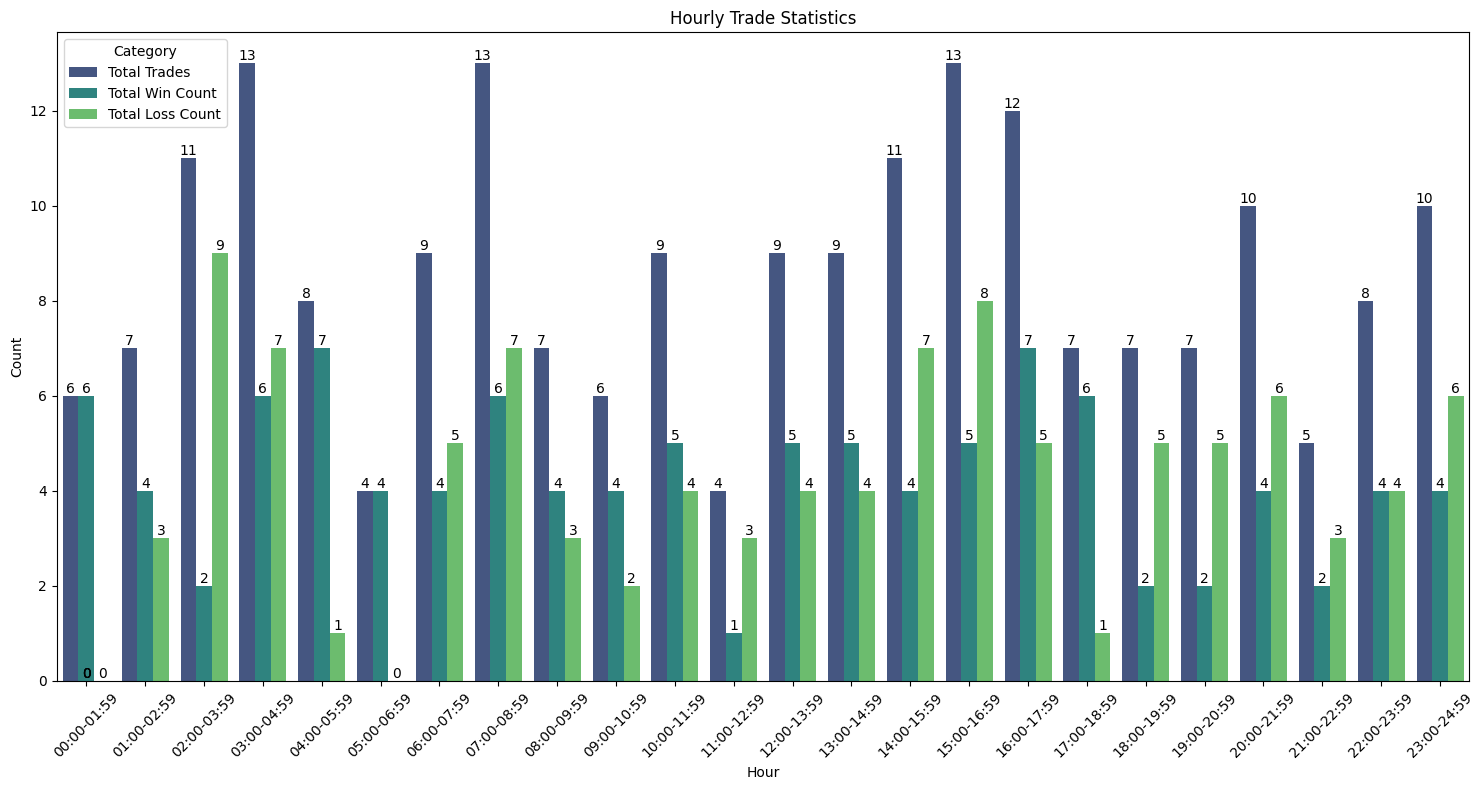

In [ ]:
# prompt: Create one bar graphs based on hourly Trade count, win Count, and loss count in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Create a wide-form DataFrame for plotting
hourly_plot_df = hourly_stats[['Hour', 'Total Trades', 'Total Win Count', 'Total Loss Count']].copy()
hourly_plot_df = hourly_plot_df.melt(id_vars=['Hour'], var_name='Category', value_name='Count')

# Create the bar chart
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Hour', y='Count', hue='Category', data=hourly_plot_df, palette='viridis')
plt.title('Hourly Trade Statistics')
plt.xlabel('Hour')
plt.ylabel('Count')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Category', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

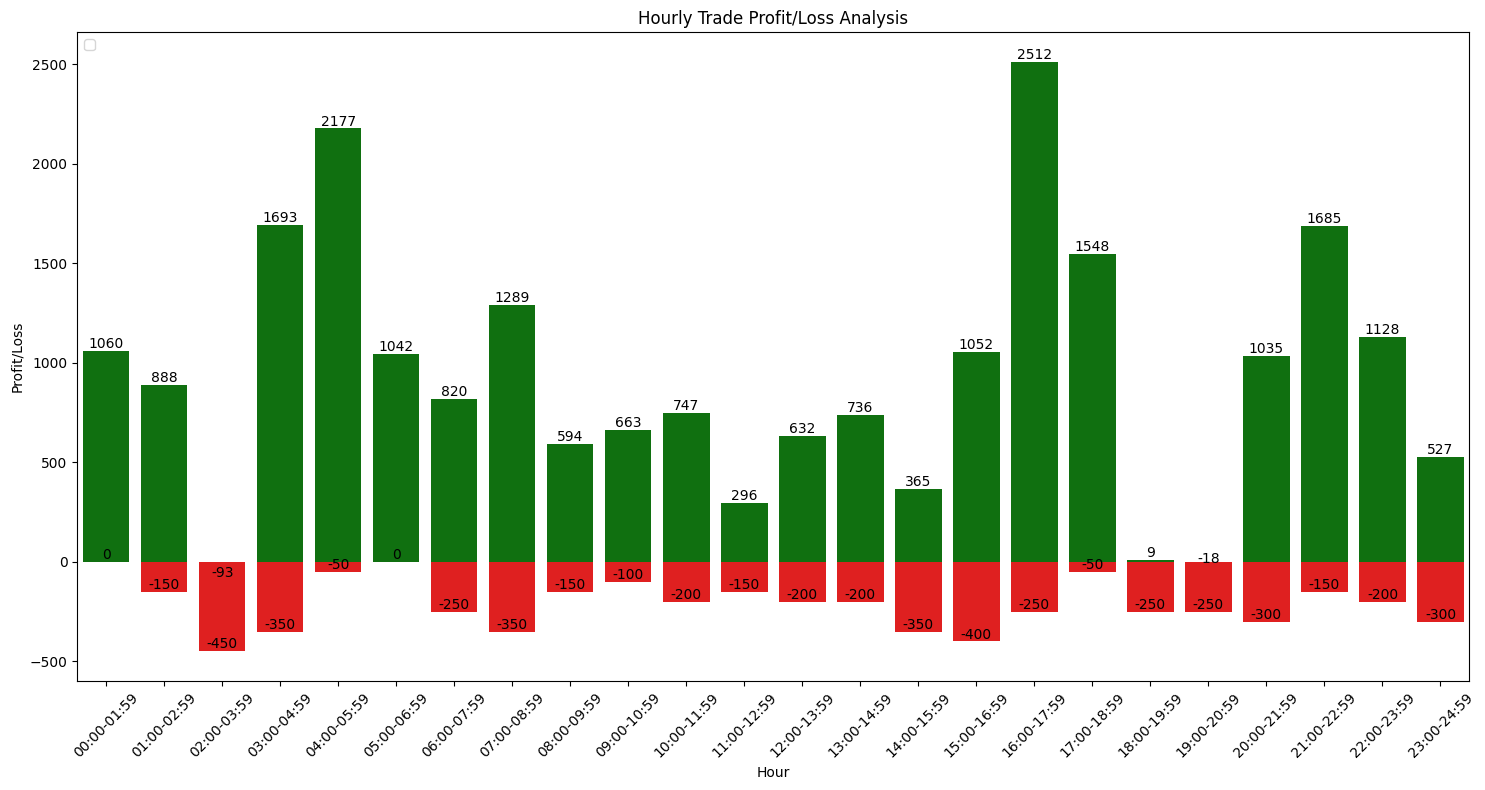

In [ ]:
# prompt: Create bar graphs based on hourly trade profit, Loss, Realized Profit in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart. Rather than three bar show it in one bar. for example, a full bar will be total profit , and two color in the bar identified Realized profit and loss

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created the hourly_stats DataFrame as shown in your code

# Create a DataFrame for plotting with Profit, Loss, and Realized Profit/Loss
hourly_plot_df = hourly_stats[['Hour', 'Total Profit', 'Total Loss', 'Realized Profit/Loss']].copy()

# Calculate the negative values for Loss
hourly_plot_df['Total Loss'] = -hourly_plot_df['Total Loss']

# Create a stacked bar chart with seaborn
plt.figure(figsize=(15, 8))

# Create the bar plot
ax = sns.barplot(x='Hour', y='Realized Profit/Loss', data=hourly_plot_df, color='green')

# Plot the negative bars for Loss on top of the positive bars
ax2 = sns.barplot(x='Hour', y='Total Loss', data=hourly_plot_df, color='red')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the chart
plt.title('Hourly Trade Profit/Loss Analysis')
plt.xlabel('Hour')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=45)
plt.tight_layout()

# Create a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Total Profit', 'Total Loss'], loc='upper left')
plt.show()

###Daily Statictics

In [ ]:
# prompt: Create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss on daily basis

# Group by date and calculate the required statistics
daily_table = df.groupby(df['startDateTime'].dt.date).agg(
    Total_Trades=('Criteria', 'count'),
    Total_Win=('Profit', lambda x: (x > 0).sum()),
    Total_Loss=('Profit', lambda x: (x < 0).sum()),
    Total_Profit=('Profit', 'sum'),
    Total_Loss_Amount=('Loss', 'sum'),
    Win_Rate=('Profit', lambda x: (x > 0).sum() / len(x) if len(x) > 0 else 0),
    Max_Profit=('Profit', 'max'),
    Max_Loss=('Profit', 'min'),
    Average_Profit=('Profit', 'mean'),
    Total_Time=('Trade Duration (hours)', 'sum'),
    Average_Time=('Trade Duration (hours)', 'mean'),
    Realized_Profit_Loss=('Profit', 'sum')  # Same as Total_Profit
)

# Calculate Win Rate
daily_table['Win_Rate'] = (daily_table['Total_Win'] / daily_table['Total_Trades']) * 100

# Reset index to make date a column
daily_table = daily_table.reset_index()
daily_table = daily_table.rename(columns={'startDateTime': 'Date'})

print(daily_table)

          Date  Total_Trades  Total_Win  Total_Loss  Total_Profit  \
0   2024-03-11             3          3           0         509.5   
1   2024-03-12             5          3           0         610.0   
2   2024-03-13             3          3           0         568.0   
3   2024-03-14             3          2           0         477.0   
4   2024-03-15             6          3           0         668.5   
5   2024-03-16             9          5           0         853.0   
6   2024-03-17             5          3           0         436.0   
7   2024-03-18             2          1           0         117.5   
8   2024-03-19             3          1           0         117.5   
9   2024-03-20             3          2           0         819.0   
10  2024-03-21             1          0           0           0.0   
11  2024-03-22             4          2           0         878.0   
12  2024-03-23             1          1           0         185.5   
13  2024-03-24             4      

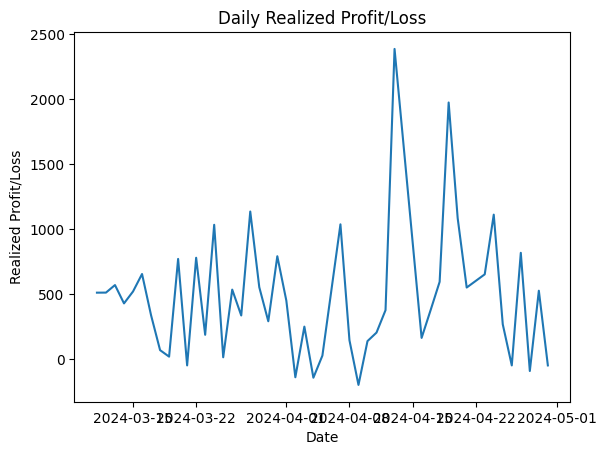

In [ ]:

plt.plot(daily_win_loss.index, daily_win_loss['Realized Profit/Loss'])
plt.xlabel('Date')
plt.ylabel('Realized Profit/Loss')
plt.title('Daily Realized Profit/Loss')
plt.show()

###Weekly Statistics

In [ ]:
# prompt: Create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss by week day

# Group by weekday and calculate statistics
weekday_table = df.groupby('Start_Weekday').agg(
    Total_Trade=('Result', 'count'),
    Total_Win=('Result', lambda x: (x == 'W').sum()),
    Total_Loss=('Result', lambda x: (x == 'L').sum()),
    Total_Profit=('Profit', 'sum'),
    Total_Loss_Amount=('Loss', 'sum'),
    Win_Rate=('Result', lambda x: (x == 'W').sum() / len(x) if len(x) > 0 else 0),
    Max_Profit=('Profit', 'max'),
    Max_Loss=('Loss', 'max'),
    Average_Profit=('Profit', 'mean'),
    Total_Time=('Trade Duration (hours)', 'sum'),
    Average_Time=('Trade Duration (hours)', 'mean'),
    Realized_Profit_Loss=('Profit', 'sum')
)


weekday_table['Realized_Profit_Loss'] = weekday_table['Total_Profit'] - weekday_table['Total_Loss_Amount']


print(weekday_table)

               Total_Trade  Total_Win  Total_Loss  Total_Profit  \
Start_Weekday                                                     
Friday                  29         16          13        4820.5   
Monday                  24         12          12        2306.0   
Saturday                32         19          12        6010.5   
Sunday                  33         16          17        4498.0   
Thursday                23         11          12        3027.5   
Tuesday                 35         12          23        2631.5   
Wednesday               29         16          13        4191.5   

               Total_Loss_Amount  Win_Rate  Max_Profit  Max_Loss  \
Start_Weekday                                                      
Friday                       650  0.551724       778.0        50   
Monday                       600  0.500000       498.5        50   
Saturday                     600  0.593750      1410.0        50   
Sunday                       850  0.484848       839.5  

In [ ]:
weekday_table.head(8)

,Total_Trade,Total_Win,Total_Loss,Total_Profit,Total_Loss_Amount,Win_Rate,Max_Profit,Max_Loss,Average_Profit,Total_Time,Average_Time,Realized_Profit_Loss
Start_Weekday,,,,,,,,,,,,
Friday,29,16,13,4820.5,650,0.551724,778.0,50,166.224138,85.666667,2.954023,4170.5
Monday,24,12,12,2306.0,600,0.500000,498.5,50,96.083333,42.500000,1.770833,1706.0
Saturday,32,19,12,6010.5,600,0.593750,1410.0,50,187.828125,110.333333,3.447917,5410.5
Sunday,33,16,17,4498.0,850,0.484848,839.5,50,136.303030,119.000000,3.606061,3648.0
Thursday,23,11,12,3027.5,600,0.478261,640.0,50,131.630435,92.666667,4.028986,2427.5
Tuesday,35,12,23,2631.5,1150,0.342857,482.0,50,75.185714,39.750000,1.135714,1481.5
Wednesday,29,16,13,4191.5,650,0.551724,680.5,50,144.534483,98.666667,3.402299,3541.5


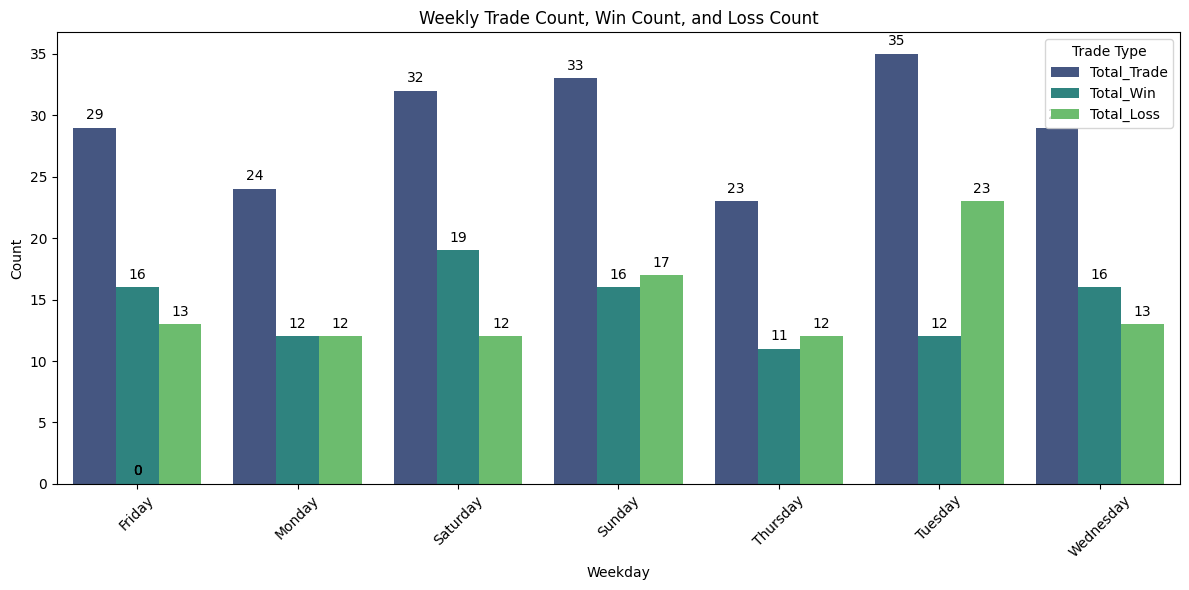

In [ ]:
# prompt: Create Some bar graphs based on weekly Trade couint, win Count, and loss count in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weekday_table is your DataFrame with 'Total_Trade', 'Total_Win', 'Total_Loss'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = weekday_table[['Total_Trade', 'Total_Win', 'Total_Loss']].reset_index()

# Melt the DataFrame to long-form for seaborn
plot_data_melted = pd.melt(plot_data, id_vars=['Start_Weekday'], value_vars=['Total_Trade', 'Total_Win', 'Total_Loss'], var_name='Trade_Type', value_name='Count')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Start_Weekday', y='Count', hue='Trade_Type', data=plot_data_melted, palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Weekly Trade Count, Win Count, and Loss Count')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Trade Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

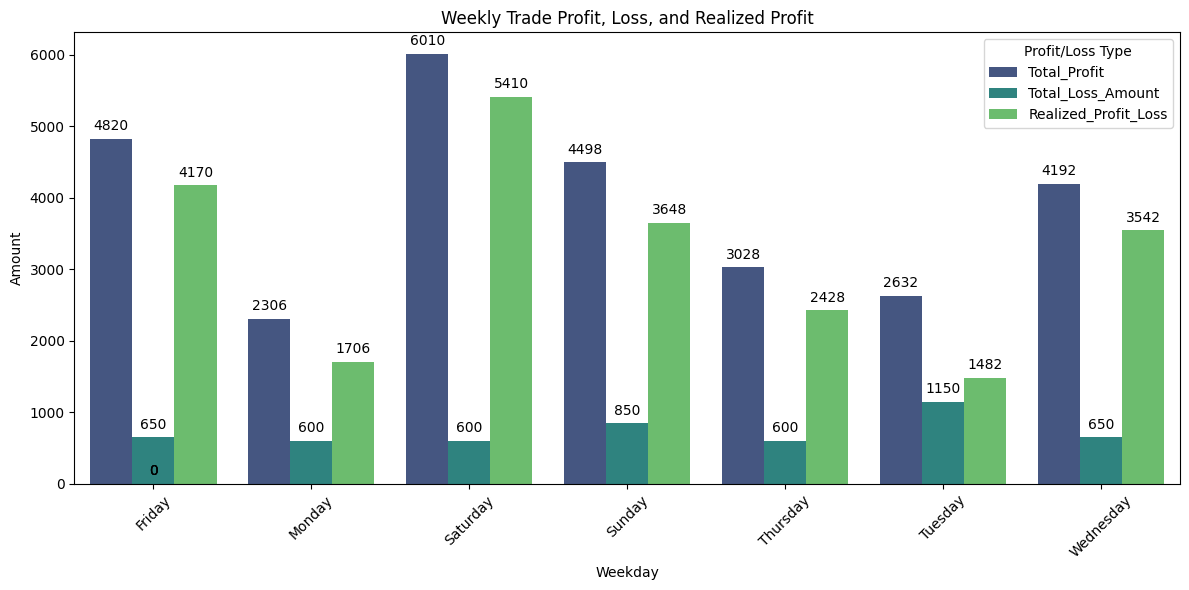

In [ ]:
# prompt: Create bar graphs based on weekly trade profit, Loss, Realized Profit in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weekday_table is your DataFrame with 'Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = weekday_table[['Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss']].reset_index()

# Melt the DataFrame to long-form for seaborn
plot_data_melted = pd.melt(plot_data, id_vars=['Start_Weekday'], value_vars=['Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss'], var_name='Profit_Loss_Type', value_name='Amount')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Start_Weekday', y='Amount', hue='Profit_Loss_Type', data=plot_data_melted, palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Weekly Trade Profit, Loss, and Realized Profit')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.legend(title='Profit/Loss Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Monthly Statistics

In [ ]:
# prompt: Create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss  on Monthly basis

# ###Monthly Statistics

# Group by month and calculate statistics
monthly_table = df.groupby(df['startDateTime'].dt.to_period('M')).agg(
    Total_Trade=('Result', 'count'),
    Total_Win=('Result', lambda x: (x == 'W').sum()),
    Total_Loss=('Result', lambda x: (x == 'L').sum()),
    Total_Profit=('Profit', 'sum'),
    Total_Loss_Amount=('Loss', 'sum'),
    Win_Rate=('Result', lambda x: (x == 'W').sum() / len(x) if len(x) > 0 else 0),
    Max_Profit=('Profit', 'max'),
    Max_Loss=('Loss', 'max'),
    Average_Profit=('Profit', 'mean'),
    Total_Time=('Trade Duration (hours)', 'sum'),
    Average_Time=('Trade Duration (hours)', 'mean'),
    Realized_Profit_Loss=('Profit', 'sum')
)

monthly_table['Realized_Profit_Loss'] = monthly_table['Total_Profit'] - monthly_table['Total_Loss_Amount']

print(monthly_table)

               Total_Trade  Total_Win  Total_Loss  Total_Profit  \
startDateTime                                                     
2024-03                 81         46          35       11714.5   
2024-04                124         56          67       15771.0   

               Total_Loss_Amount  Win_Rate  Max_Profit  Max_Loss  \
startDateTime                                                      
2024-03                     1750  0.567901       839.5        50   
2024-04                     3350  0.451613      1410.0        50   

               Average_Profit  Total_Time  Average_Time  Realized_Profit_Loss  
startDateTime                                                                  
2024-03            144.623457  250.250000      3.089506                9964.5  
2024-04            127.185484  338.333333      2.728495               12421.0  


In [ ]:
monthly_table.head()

,Total_Trade,Total_Win,Total_Loss,Total_Profit,Total_Loss_Amount,Win_Rate,Max_Profit,Max_Loss,Average_Profit,Total_Time,Average_Time,Realized_Profit_Loss
startDateTime,,,,,,,,,,,,
2024-03,81,46,35,11714.5,1750,0.567901,839.5,50,144.623457,250.250000,3.089506,9964.5
2024-04,124,56,67,15771.0,3350,0.451613,1410.0,50,127.185484,338.333333,2.728495,12421.0


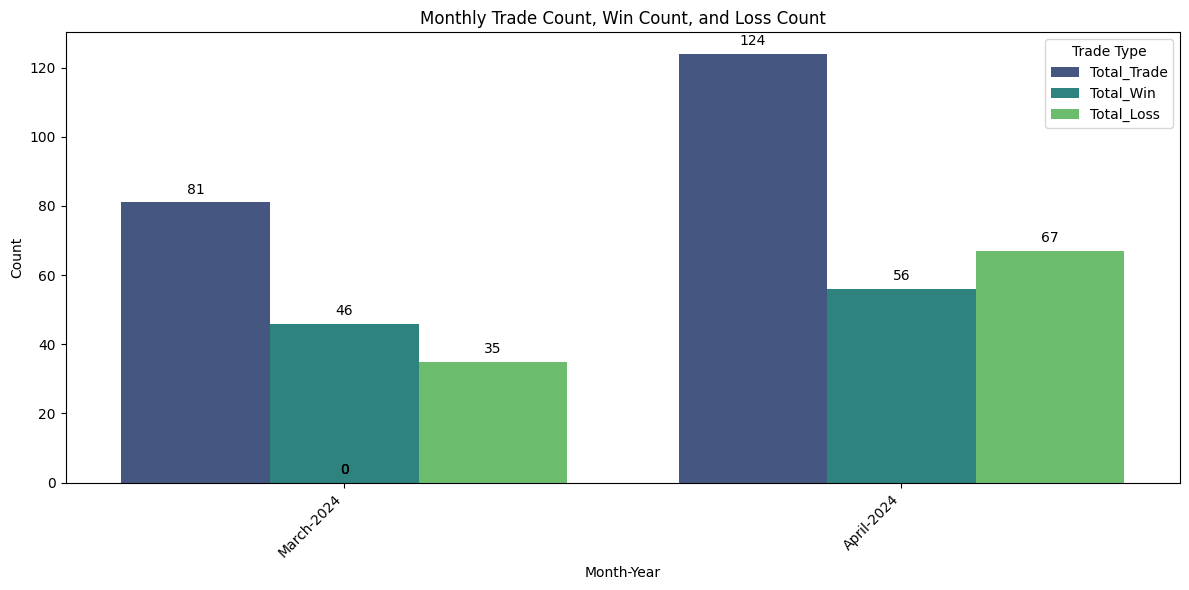

In [ ]:
# prompt: Create  bar graphs based on monthly Trade couint, win Count, and loss count in color bar chart. Make the chart stylish using seaborn and show count number on the bar and Make it in one chart and Instead of date show month name and year like March-2024, April-2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming monthly_table is your DataFrame with 'Total_Trade', 'Total_Win', 'Total_Loss'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = monthly_table[['Total_Trade', 'Total_Win', 'Total_Loss']].reset_index()

# Convert the PeriodIndex to a string in the format "Month-Year"
plot_data['startDateTime'] = plot_data['startDateTime'].dt.strftime('%B-%Y')

# Melt the DataFrame to long-form for seaborn
plot_data_melted = pd.melt(plot_data, id_vars=['startDateTime'], value_vars=['Total_Trade', 'Total_Win', 'Total_Loss'], var_name='Trade_Type', value_name='Count')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='startDateTime', y='Count', hue='Trade_Type', data=plot_data_melted, palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Monthly Trade Count, Win Count, and Loss Count')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(title='Trade Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

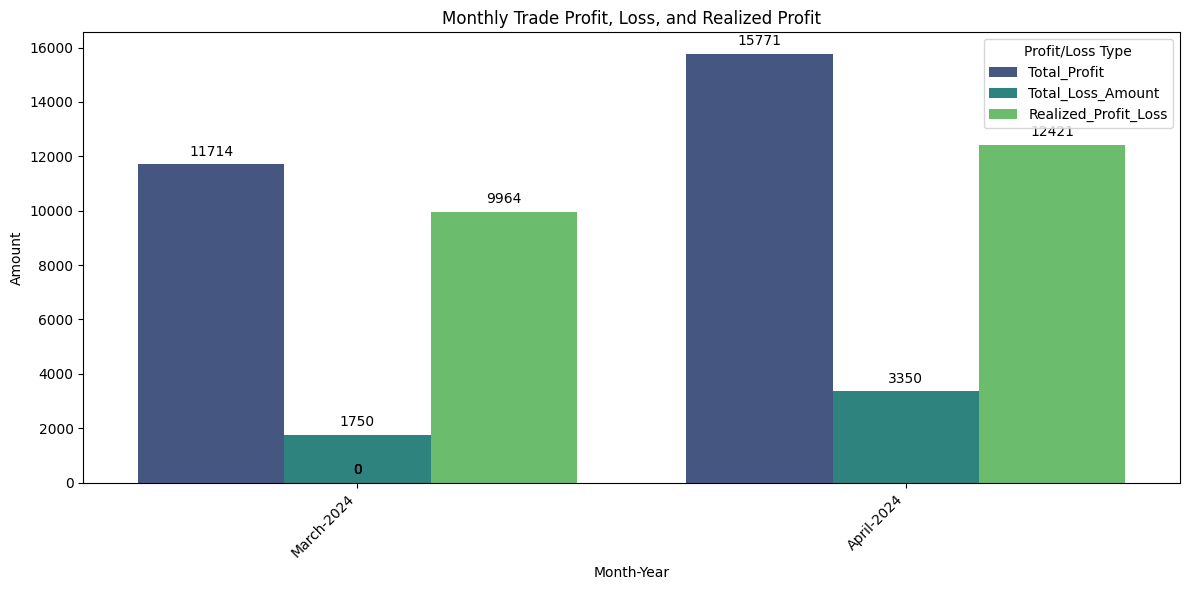

In [ ]:
# prompt: Create bar graphs based on weekly trade profit, Loss, Realized Profit in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart and Instead of date show month name and year like March-2024, April-2024

# Assuming monthly_table is your DataFrame with 'Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = monthly_table[['Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss']].reset_index()

# Convert the PeriodIndex to a string in the format "Month-Year"
plot_data['startDateTime'] = plot_data['startDateTime'].dt.strftime('%B-%Y')

# Melt the DataFrame to long-form for seaborn
plot_data_melted = pd.melt(plot_data, id_vars=['startDateTime'], value_vars=['Total_Profit', 'Total_Loss_Amount', 'Realized_Profit_Loss'], var_name='Profit_Loss_Type', value_name='Amount')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='startDateTime', y='Amount', hue='Profit_Loss_Type', data=plot_data_melted, palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Monthly Trade Profit, Loss, and Realized Profit')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend(title='Profit/Loss Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

###Session Statistics

In [ ]:
# prompt: Make a dictionary of this sessions start and end time
# Sydney Session: 22:00 to 00:00 UTC
# Sydney & Tokyo Overlap: 00:00 to 07:00 UTC
# Tokyo Session: 07:00 to 09:00 UTC
# London Session: 07:00 to 13:30 UTC
# London & New York Overlap: 13:30 to 16:00 UTC
# New York Session: 16:00 to 20:30 UTC
# Based on the sessions create a table that includes data Total Trade, Total win, Total Loss, Total Profit,  Total Loss,  Win Rate, Max Profit, Max Loss, Average profit, Total Time, Average Time, Realized Profit/Loss by session.

session_dict = {
    "Sydney Session": {"start": "22:00", "end": "00:00"},
    "Sydney & Tokyo Overlap": {"start": "00:00", "end": "07:00"},
    "Tokyo Session": {"start": "07:00", "end": "09:00"},
    "London Session": {"start": "07:00", "end": "13:30"},
    "London & New York Overlap": {"start": "13:30", "end": "16:00"},
    "New York Session": {"start": "16:00", "end": "20:30"},
}

# Create an empty DataFrame to store session-based statistics
session_table = pd.DataFrame(columns=['Session', 'Total Trades', 'Total Win Count', 'Total Loss Count', 'Total Profit', 'Total Loss', 'Win Rate', 'Max Profit', 'Max Loss', 'Average Profit', 'Total Time', 'Average Time', 'Realized Profit/Loss'])


# Function to check if a trade falls within a specific session
def is_within_session(trade_time, session_start, session_end):
    trade_hour = trade_time.hour
    trade_minute = trade_time.minute

    start_hour, start_minute = map(int, session_start.split(':'))
    end_hour, end_minute = map(int, session_end.split(':'))

    if start_hour < end_hour:
        return start_hour <= trade_hour < end_hour or (trade_hour == start_hour and trade_minute >= start_minute) or (trade_hour == end_hour and trade_minute < end_minute)
    else:
        return start_hour <= trade_hour or trade_hour < end_hour or (trade_hour == start_hour and trade_minute >= start_minute) or (trade_hour == end_hour and trade_minute < end_minute)




# Iterate through sessions and calculate statistics
for session_name, session_times in session_dict.items():
  session_df = df[df.apply(lambda row: is_within_session(row['startDateTime'], session_times['start'], session_times['end']), axis=1)]
  session_stats = pd.DataFrame({
      'Session': [session_name],
      'Total Trades': [len(session_df)],
      'Total Win Count': [len(session_df[session_df['Profit'] > 0])],
      'Total Loss Count': [len(session_df[session_df['Loss'] > 0])],
      'Total Profit': [session_df['Profit'].sum()],
      'Total Loss': [session_df['Loss'].sum()],
      'Win Rate': [len(session_df[session_df['Profit/Loss'] > 0]) / len(session_df) if len(session_df) > 0 else 0],
      'Max Profit': [session_df['Profit/Loss'].max()],
      'Max Loss': [session_df['Profit/Loss'].min()],
      'Average Profit': [session_df[session_df['Profit/Loss'] > 0]['Profit/Loss'].mean() if len(session_df[session_df['Profit/Loss'] > 0]) > 0 else 0],
      'Total Time': [session_df['Trade Duration (hours)'].sum()],
      'Average Time': [session_df['Trade Duration (hours)'].mean()],
      'Realized Profit/Loss': [session_df['Profit/Loss'].sum()]
  })
  session_table = pd.concat([session_table, session_stats], ignore_index=True)


print(session_table)

                     Session Total Trades Total Win Count Total Loss Count  \
0             Sydney Session           18               8               10   
1     Sydney & Tokyo Overlap           58              33               25   
2              Tokyo Session           20              10               10   
3             London Session           53              26               27   
4  London & New York Overlap           33              14               19   
5           New York Session           40              20               20   

   Total Profit Total Loss  Win Rate  Max Profit  Max Loss  Average Profit  \
0        2155.0        500  0.444444       778.0     -50.0      269.375000   
1        8837.5       1250  0.568966       839.5     -50.0      267.803030   
2        2382.5        500  0.500000       500.0     -50.0      238.250000   
3        5478.5       1350  0.490566       500.0     -50.0      210.711538   
4        3103.5        950  0.424242       537.0     -50.0     

<ipython-input-42-d58bc5f52378>:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  session_table = pd.concat([session_table, session_stats], ignore_index=True)


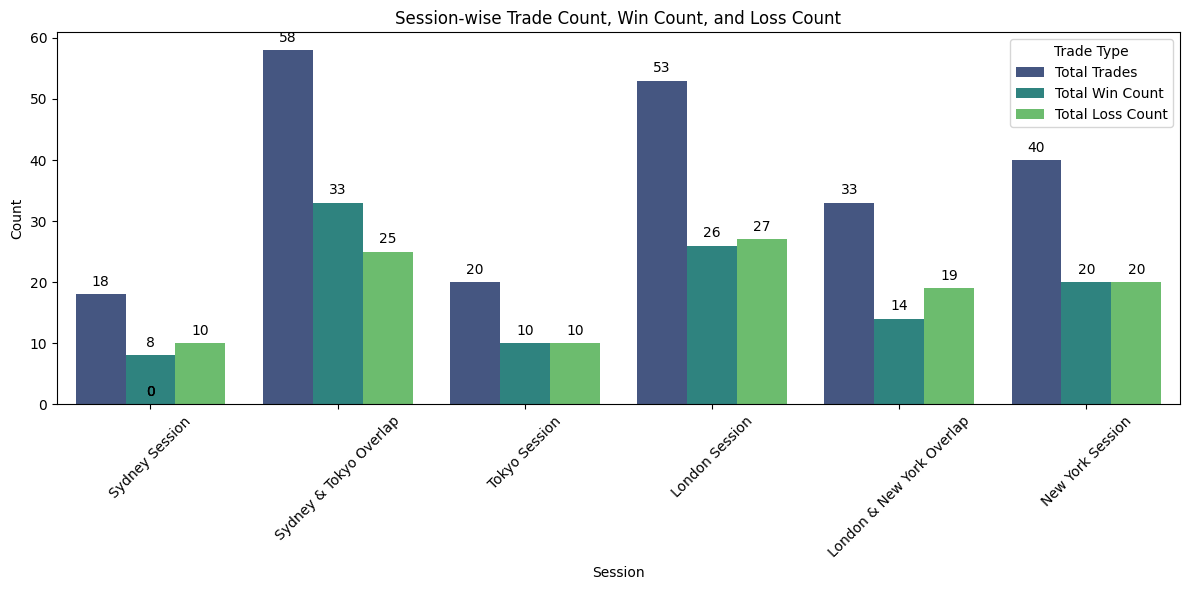

In [ ]:
# prompt: Create  bar graphs based on sessions Trade count, win Count, and loss count in color bar chart. Make the chart stylish using seaborn and show count number on the bar and Make it in one chart

# Assuming session_table is your DataFrame with 'Total Trades', 'Total Win Count', 'Total Loss Count'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = session_table[['Session', 'Total Trades', 'Total Win Count', 'Total Loss Count']].copy()

# Melt the DataFrame to long-form for seaborn
plot_data_melted = pd.melt(plot_data, id_vars=['Session'], value_vars=['Total Trades', 'Total Win Count', 'Total Loss Count'], var_name='Trade_Type', value_name='Count')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Session', y='Count', hue='Trade_Type', data=plot_data_melted, palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Session-wise Trade Count, Win Count, and Loss Count')
plt.xlabel('Session')
plt.ylabel('Count')
plt.legend(title='Trade Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

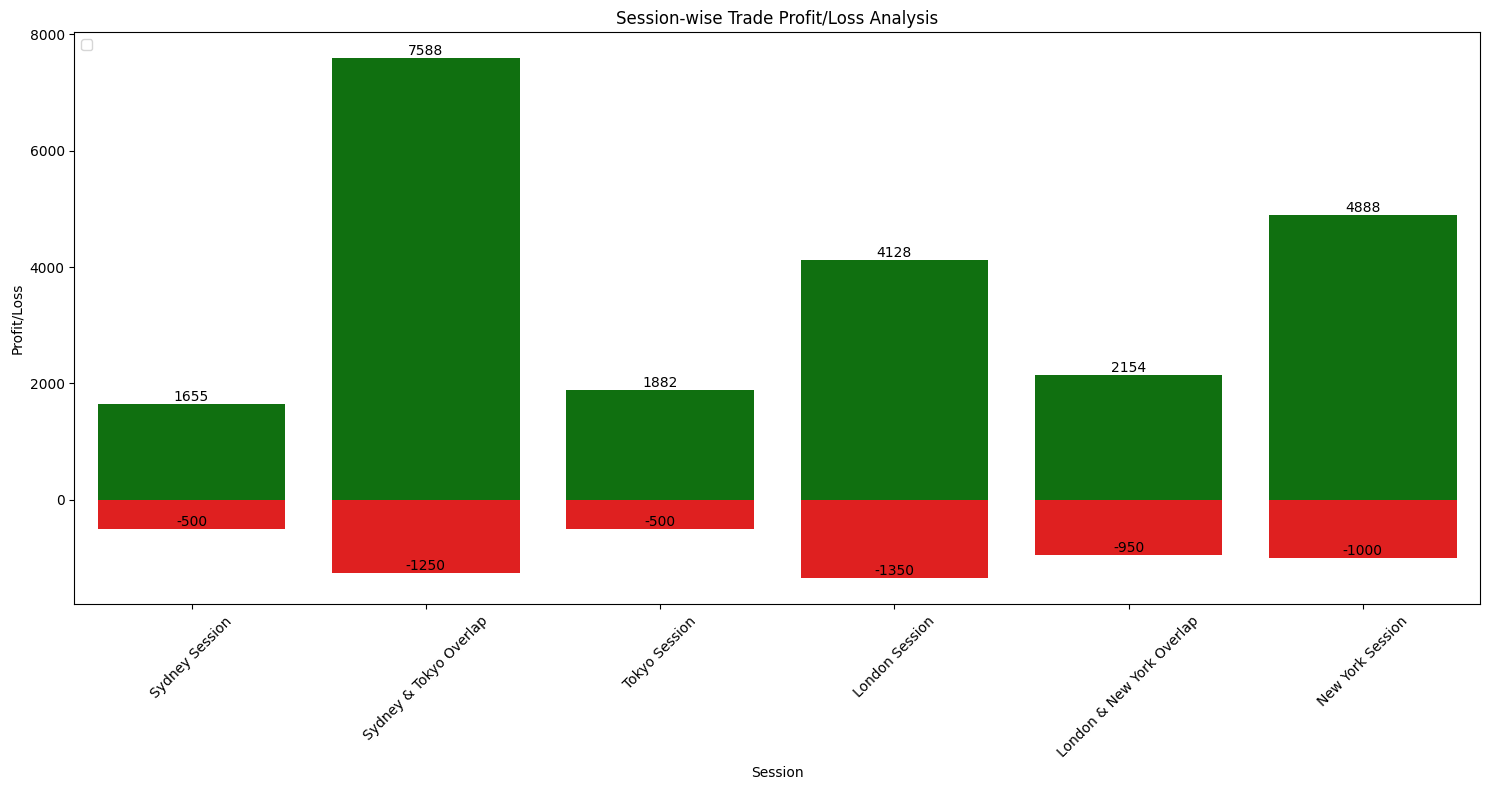

In [ ]:
# prompt: Create bar graphs based on sessions trade profit, Loss, Realized Profit in color bar chart. Make the chart stylish using seaborn and show count number on the bar. Make it in one chart. Rather than three bar show it in one bar. for example, a full bar will be total profit , and two color in the bar identified Realized profit and loss

# Assuming session_table is your DataFrame with 'Total Profit', 'Total Loss', 'Realized Profit/Loss'
# You might need to adjust column names based on your actual DataFrame

# Create a wide-form DataFrame for plotting
plot_data = session_table[['Session', 'Total Profit', 'Total Loss', 'Realized Profit/Loss']].copy()

# Calculate the negative values for Loss
plot_data['Total Loss'] = -plot_data['Total Loss']


# Create a stacked bar chart with seaborn
plt.figure(figsize=(15, 8))

# Create the bar plot
ax = sns.barplot(x='Session', y='Realized Profit/Loss', data=plot_data, color='green')

# Plot the negative bars for Loss on top of the positive bars
ax2 = sns.barplot(x='Session', y='Total Loss', data=plot_data, color='red')


# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


# Customize the chart
plt.title('Session-wise Trade Profit/Loss Analysis')
plt.xlabel('Session')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=45)
plt.tight_layout()

# Create a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Total Profit', 'Total Loss'], loc='upper left')
plt.show()